# Homework 5


Apply the EDA techniques we learnt today to `flights` dataset and write a short report.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/nyc_flights.csv'
flights = pd.read_csv(url)

<h3>Understanding and Cleaning Data</h3>

In [2]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

<h4>Initial Analysis</h4>
<li>We have data in all the columns</li>
<li>In total we have 336776 rows and 19 columns</li>
<li>We have 5 columns with float values, 9 columns with int data, 5 columns wiith object type data</li>

In [3]:
# Printing head to see shape of the data. If the data shape is consistent with dimensions from info method.
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [4]:
flights.shape

(336776, 19)

<h4>Get Datatypes of the each column</h4>

In [5]:
flights.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object

In [6]:
flights.isna().sum()[flights.isna().sum()>0]

dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
tailnum      2512
air_time     9430
dtype: int64

In [7]:
flights.describe(include='all')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776,336776.000000,334264,336776,336776,327346.000000,336776.000000,336776.000000,336776.000000,336776
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,4043,3,105,NaN,NaN,NaN,NaN,6936
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UA,NaN,N725MQ,EWR,ORD,NaN,NaN,NaN,NaN,2013-09-13T12:00:00Z
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58665,NaN,575,120835,17283,NaN,NaN,NaN,NaN,94
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,NaN,1971.923620,NaN,NaN,NaN,150.686460,1039.912604,13.180247,26.230100,NaN
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,NaN,1632.471938,NaN,NaN,NaN,93.688305,733.233033,4.661316,19.300846,NaN
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,NaN,1.000000,NaN,NaN,NaN,20.000000,17.000000,1.000000,0.000000,NaN
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,NaN,553.000000,NaN,NaN,NaN,82.000000,502.000000,9.000000,8.000000,NaN
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,NaN,1496.000000,NaN,NaN,NaN,129.000000,872.000000,13.000000,29.000000,NaN
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,NaN,3465.000000,NaN,NaN,NaN,192.000000,1389.000000,17.000000,44.000000,NaN


In [8]:
# Dropping unused columns in visualizations
flights.drop(axis=1, columns=['dep_time','sched_arr_time', 'sched_dep_time'], inplace=True)
# Dropping rows which doesn't have a tailnum
flights = flights[flights['tailnum'].notna()]

In [9]:
flights.isna().sum()[flights.isna().sum()>0]

dep_delay    5743
arr_time     6201
arr_delay    6918
air_time     6918
dtype: int64

In [10]:
flights

,year,month,day,dep_delay,arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,2.0,830.0,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,4.0,850.0,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,2.0,923.0,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,-1.0,1004.0,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,-6.0,812.0,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336769,2013,9,30,-10.0,325.0,-25.0,B6,745,N516JB,JFK,PSE,196.0,1617,23,59,2013-10-01T03:00:00Z
336770,2013,9,30,NaN,NaN,NaN,EV,5274,N740EV,LGA,BNA,NaN,764,18,42,2013-09-30T22:00:00Z
336773,2013,9,30,NaN,NaN,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z
336774,2013,9,30,NaN,NaN,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z


In [11]:
flights.isna().sum()[flights.isna().sum()>0]

dep_delay    5743
arr_time     6201
arr_delay    6918
air_time     6918
dtype: int64

In [12]:
flights = flights[flights['air_time'].notna()]
flights['time_hour']=pd.to_datetime(flights['time_hour'], infer_datetime_format=True)
flights['dayofweek']=pd.to_datetime(flights['time_hour'], infer_datetime_format=True).dt.dayofweek
flights['speed_per_min'] = flights.distance / flights.air_time

C:\Users\dhssr\AppData\Local\Temp/ipykernel_12500/2864194282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['time_hour']=pd.to_datetime(flights['time_hour'], infer_datetime_format=True)
C:\Users\dhssr\AppData\Local\Temp/ipykernel_12500/2864194282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['dayofweek']=pd.to_datetime(flights['time_hour'], infer_datetime_format=True).dt.dayofweek
C:\Users\dhssr\AppData\Local\Temp/ipykernel_12500/2864194282.py:4: SettingWithCopyWarning: 
A value i

In [13]:
flights

,year,month,day,dep_delay,arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,dayofweek,speed_per_min
0,2013,1,1,2.0,830.0,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 10:00:00,1,6.167401
1,2013,1,1,4.0,850.0,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 10:00:00,1,6.237885
2,2013,1,1,2.0,923.0,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 10:00:00,1,6.806250
3,2013,1,1,-1.0,1004.0,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 10:00:00,1,8.612022
4,2013,1,1,-6.0,812.0,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 11:00:00,1,6.568966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,-5.0,2334.0,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,2013-10-01 02:00:00,1,5.097561
336766,2013,9,30,-10.0,2347.0,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,2013-10-01 02:00:00,1,5.788462
336767,2013,9,30,-5.0,2345.0,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,2013-10-01 02:00:00,1,5.617021
336768,2013,9,30,12.0,2359.0,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,2013-10-01 02:00:00,1,5.666667


In [14]:
flights.isna().sum()

year             0
month            0
day              0
dep_delay        0
arr_time         0
arr_delay        0
carrier          0
flight           0
tailnum          0
origin           0
dest             0
air_time         0
distance         0
hour             0
minute           0
time_hour        0
dayofweek        0
speed_per_min    0
dtype: int64

<h2>Visualization and Plotting</h2>

Text(0.5, 1.0, 'Number of Flights from Each Destination')

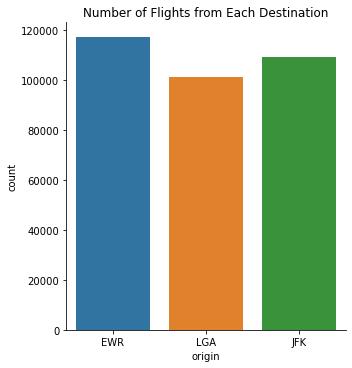

In [15]:
plot=sns.catplot(data= flights, kind = 'count', x = 'origin')
plot.ax.set_title('Number of Flights from Each Destination')

Text(0.5, 1.0, 'Number of flights from each carrier')

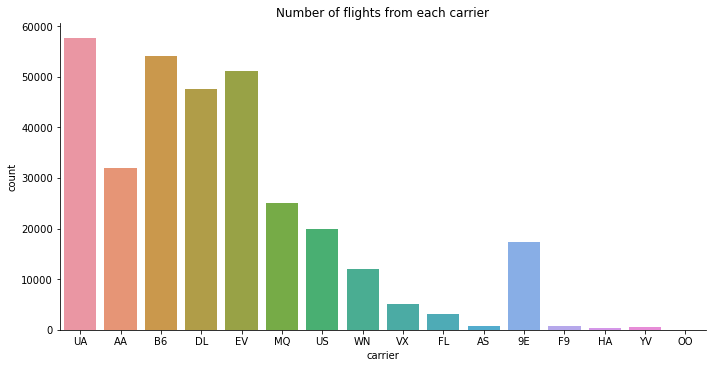

In [16]:
plot=sns.catplot(data= flights, kind = 'count', x = 'carrier', aspect=2)
plot.ax.set_title('Number of flights from each carrier')

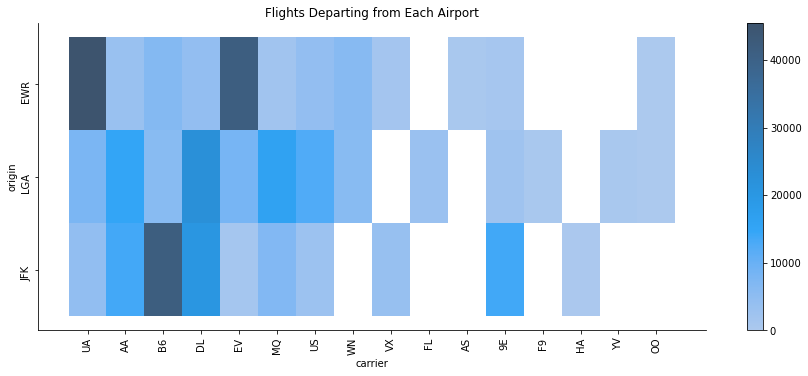

In [17]:
plot = sns.displot(data=flights, x="carrier", y="origin", cbar=True, aspect=2.5)
plot.ax.set_title('Flights Departing from Each Airport')
plot.ax.tick_params(labelrotation = 90)

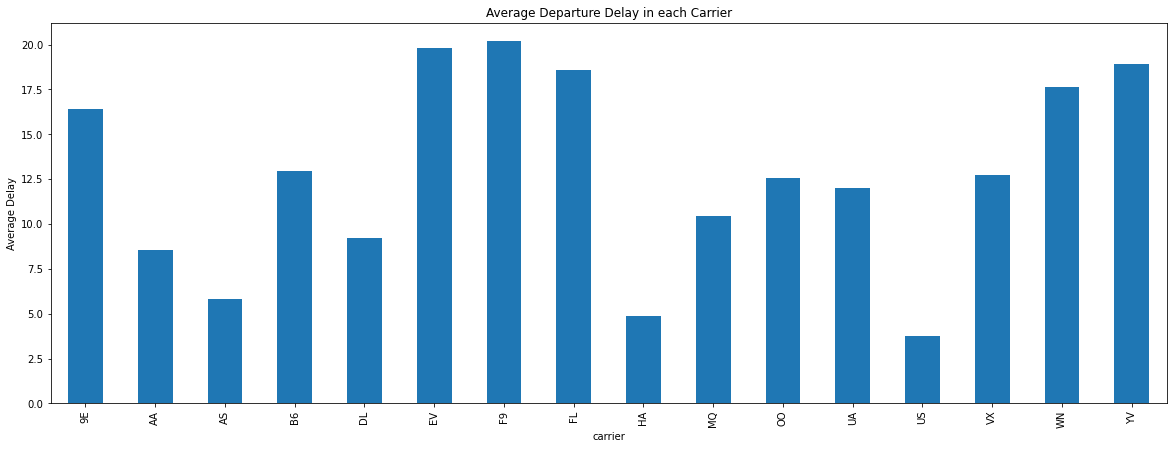

In [18]:
grouped_byCarrier_averageDelay=flights.groupby('carrier').dep_delay.mean()
grouped_byCarrier_averageDelay.plot.bar(figsize=(20, 7))
plt.ylabel("Average Delay")
plt.title("Average Departure Delay in each Carrier")
plt.show()

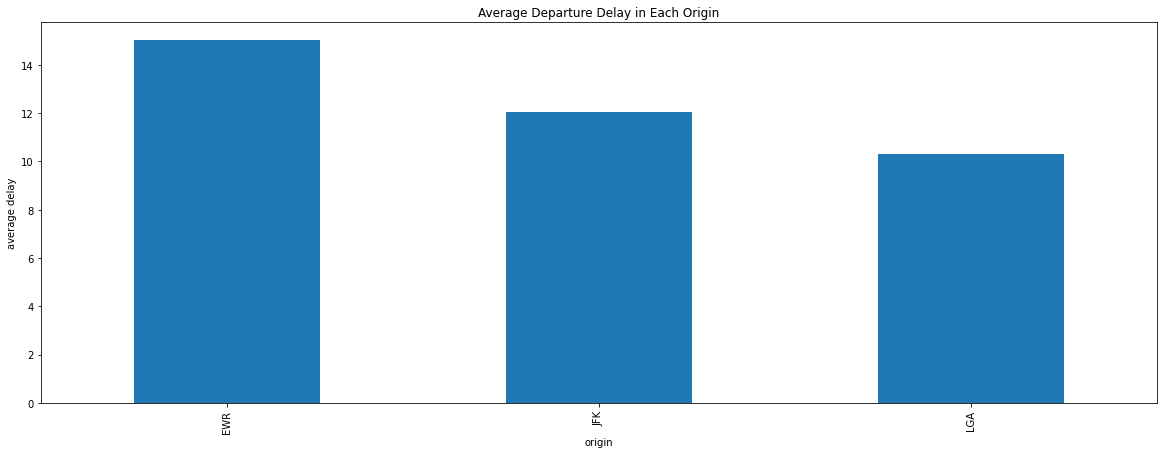

In [19]:
grouped_byOrigin_averageDelay=flights.groupby('origin').dep_delay.mean()
grouped_byOrigin_averageDelay.plot.bar(figsize=(20,7))
plt.ylabel('average delay')
plt.title("Average Departure Delay in Each Origin")
plt.show()

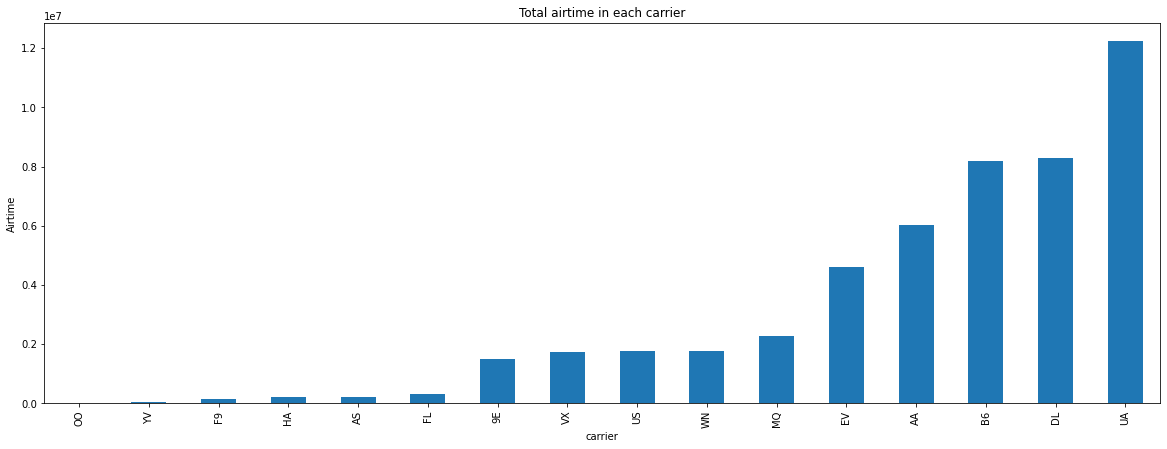

In [20]:
grouped_by_maxAirtime = flights.groupby('carrier').air_time.sum().sort_values()
grouped_by_maxAirtime.plot.bar(figsize=(20, 7))
plt.ylabel('Airtime')
plt.title("Total airtime in each carrier")
plt.show()

plot=sns.catplot(data= flights, kind = 'count', x = 'dest', aspect=2.5, )
plot.ax.tick_params(labelrotation = 90)
plot.ax.set_title('Flight counts based on destination')

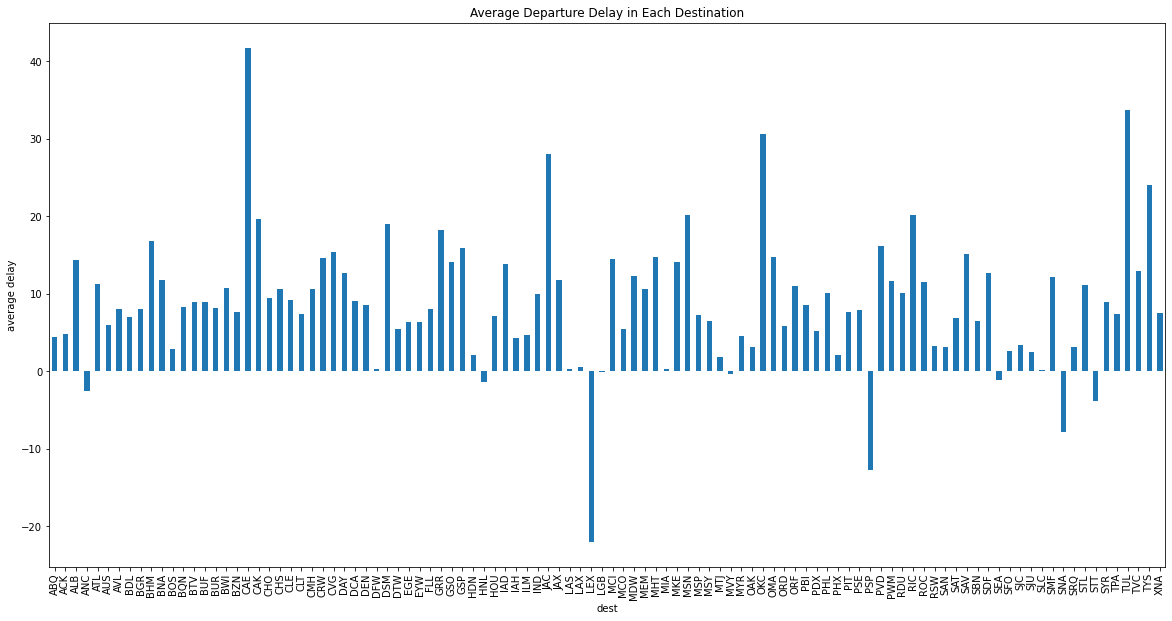

In [21]:
grouped_byDest_averageDelay=flights.groupby('dest').arr_delay.mean()
grouped_byDest_averageDelay.plot.bar(figsize=(20,10))
plt.ylabel('average delay')
plt.title("Average Departure Delay in Each Destination")
plt.show()

Text(0.5, 1.0, 'Day of the week Number of flights')

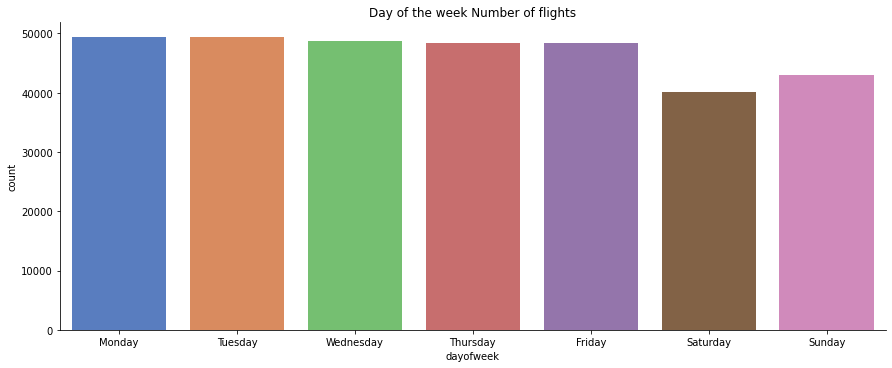

In [22]:
plot=sns.catplot(data= flights, kind = 'count', x = 'dayofweek', aspect=2.5, palette="muted")
plot.set_xticklabels(['Monday','Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'])
plot.ax.set_title("Day of the week Number of flights")

Text(0, 0.5, 'speed per minute')

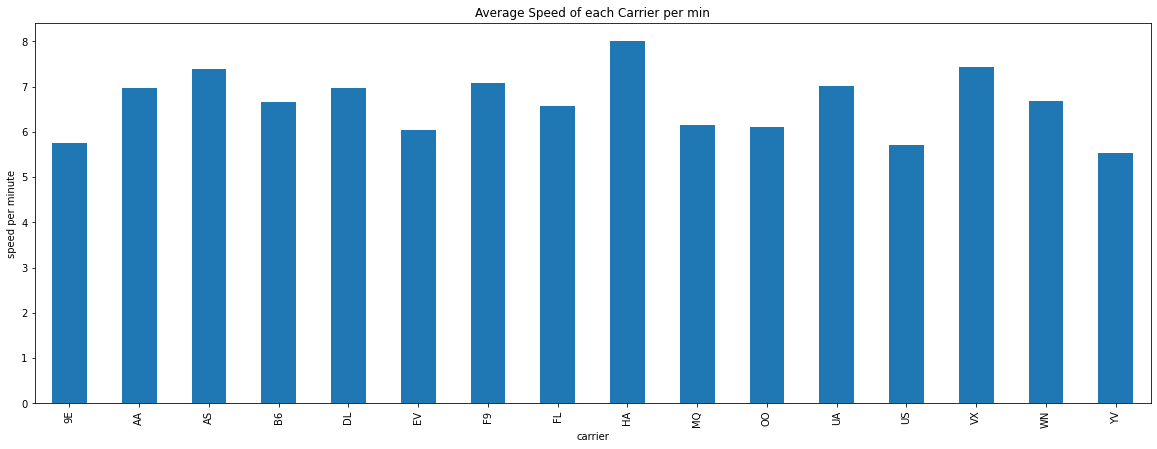

In [23]:
flights.groupby('carrier').speed_per_min.mean().plot.bar(figsize=(20,7))
plt.title("Average Speed of each Carrier per min")
plt.ylabel("speed per minute")

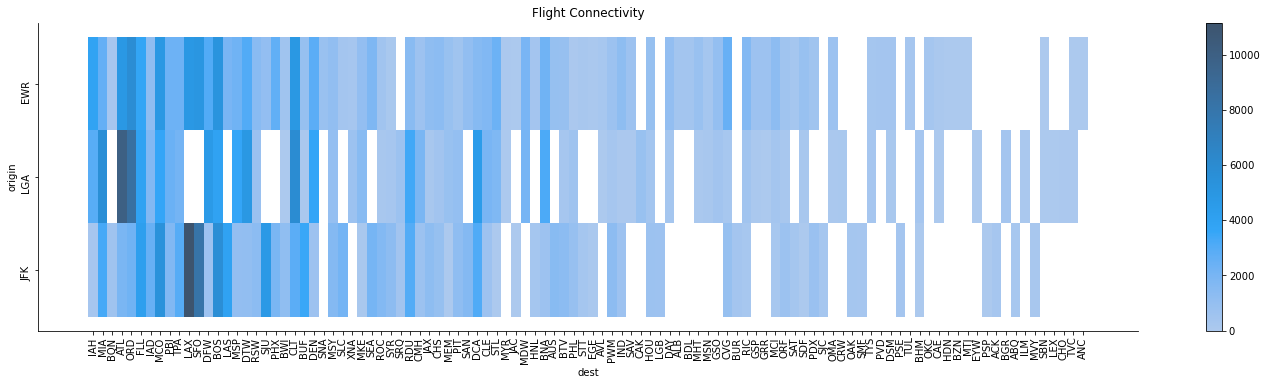

In [24]:
plot = sns.displot(data=flights, x="dest", y="origin", cbar=True, aspect=4)
plot.ax.set_title('Flight Connectivity')
plot.ax.tick_params(labelrotation = 90)

Text(0.5, 1.0, 'Arilines taking long distance flights')

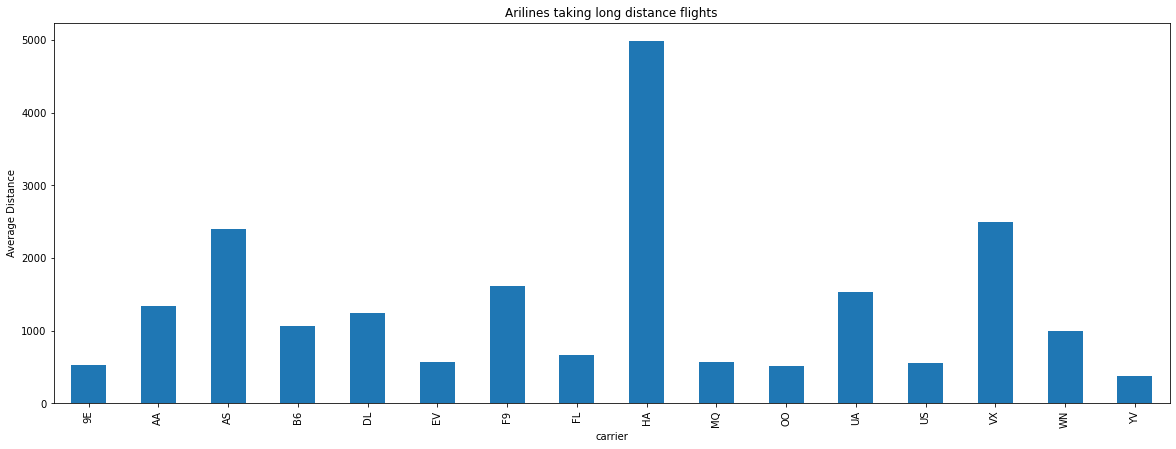

In [25]:
flights.groupby('carrier').distance.mean().plot.bar(figsize=(20,7))
plt.ylabel('Average Distance')
plt.title("Arilines taking long distance flights")

Text(0.5, 1.0, 'box plot to show outliers and average departure delay in each carrier')

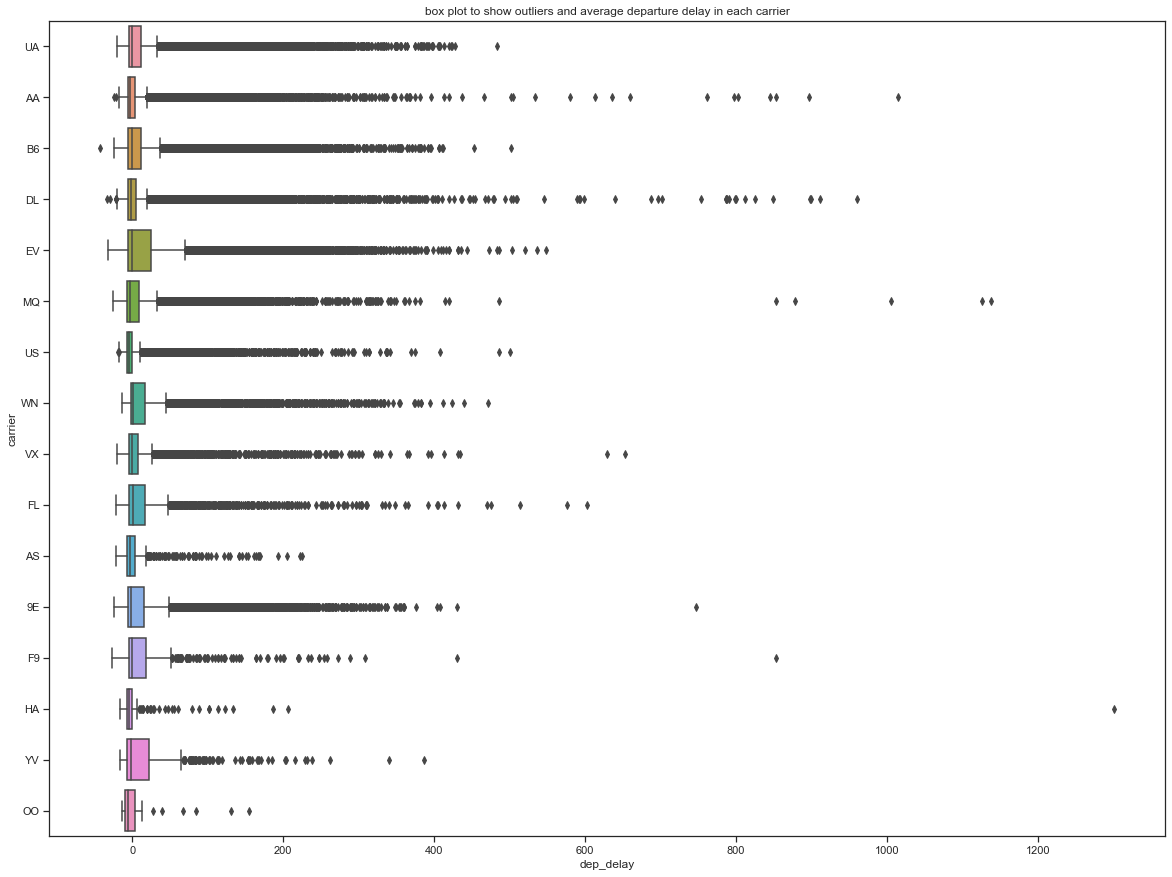

In [26]:
sns.set(rc={"figure.figsize":(20, 15)}) #width=12, #height=7
sns.set_style('ticks')
plot = sns.boxplot(y = 'carrier', x = 'dep_delay', data = flights)
plot.set_title("box plot to show outliers and average departure delay in each carrier")

<h5>Summary</h5>
<ul>
    <li>Most number of flights take off from EWR Airport and least number of flights from LGA</li>
    <li>United airlines has most number of flights and OO airline has least number of flights</li>
    <li>"WN", "FL", "AS", "F9", YV, OO doesnt have any flights from JFK airport</li>
    <li>"VX", "AS", "HA" doesn't have any flights from LGA airport</li>
    <li>"FL", "F9", "HA", "YV" doesn't have any operations from EWR Airport</li>
    <li>"F9", "EV", "FL" has highest carriers have highest departure delays</li>
    <li>"US", "HA" have minimum delays when compared to other airlines</li>
    <li>Flights reaching CAE airport has largest arrival delays</li>
    <li>Number of flights travelling from each airport during weekday is almost same.</li>
    <li>Number of flights travelling in the weekend are less compared to weekday</li>
    <li>"hawaiian airlines" has the fastest speeds among all the carriers</li>
    <li>EWR has highest connectivity to the destination and JFK has the lowest connectivity among the three destinations</li>
    <li>"hawaiian airlines" has longest flights or "hawaiian airlines" flights are travelling great distance when compared to other carriers </li>
</ul>